In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline 

In [2]:
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [3]:
def color_variant(hex_color, brightness_offset=1):
    """ takes a color like #87c95f and produces a lighter or darker variant """
    if len(hex_color) != 7:
        raise Exception("Passed %s into color_variant(), needs to be in #87c95f format." % hex_color)
    rgb_hex = [hex_color[x:x+2] for x in [1, 3, 5]]
    new_rgb_int = [int(hex_value, 16) + brightness_offset for hex_value in rgb_hex]
    new_rgb_int = [min([255, max([0, i])]) for i in new_rgb_int] # make sure new values are between 0 and 255
    # hex() produces "0x88", we want just "88"
    return "#" + "".join([hex(i)[2:] for i in new_rgb_int])

In [4]:
color_variant("#d8b365", 120)

'#ffffdd'

In [5]:
brwn = "#8c510a"
purp = "#762a83"
teal = "#01665e"
brwns = [color_variant(brwn, (i+2)*10) for i in range(0, 9)]
purps = [color_variant(purp, (i+1)*50) for i in range(0, 3)]
teals = [color_variant(teal, (i+2)*10) for i in range(0, 13)]

In [47]:
pklfile = '../../prep-pkls/nucmoles_opusupdate_aug2019/not-scaled_fiss.pkl'
trainXY = pd.read_pickle(pklfile)
trainXY.reset_index(inplace=True, drop=True)

In [48]:
def splitXY(dfXY):
    lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
    dfX = dfXY.drop(lbls, axis=1)
    if 'total' in dfX.columns:
        dfX.drop('total', axis=1, inplace=True)
    r_dfY = dfXY.loc[:, lbls[0]]
    c_dfY = dfXY.loc[:, lbls[1]]
    e_dfY = dfXY.loc[:, lbls[2]]
    b_dfY = dfXY.loc[:, lbls[3]]
    o_dfY = dfXY.loc[:, lbls[4]]
    return dfX, r_dfY, c_dfY, e_dfY, b_dfY, o_dfY

X, rY, cY, eY, bY, oY = splitXY(trainXY)
yo = trainXY.OrigenReactor
yr = trainXY.ReactorType

In [49]:
trainXY.sample(10)

,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba138,ce140,ce142,ce144,cs133,...,xe131,xe132,xe134,xe136,y89,zr91,zr92,zr93,zr94,zr96
4536,3774.59,0.500723,1.37,w17x17,pwr,1.1380,0.8909,0.9809,0.0,1.0460,...,0.4388,0.7382,1.340,1.967,0.3714,0.4169,0.9813,1.0400,1.0670,1.0640
19310,3244.15,0.392519,3.12,atrium10x10-9,bwr,0.9705,0.7917,0.8347,0.0,0.9050,...,0.3840,0.6403,1.146,1.612,0.3486,0.3959,0.8321,0.8836,0.9062,0.9087
22402,38325.64,5.114817,3.28,svea100-0,bwr,10.8300,10.1700,9.0040,0.0,9.6110,...,3.5540,9.9630,13.080,19.800,5.2870,6.7540,7.6480,8.4390,9.0260,9.4790
15282,22012.47,33.154909,3.97,ge10x10-8,bwr,6.3030,5.9580,5.3020,0.0,5.9970,...,2.4450,5.2650,7.578,10.960,3.3130,4.1690,4.7290,5.1710,5.4410,5.6510
19177,21794.04,23.238887,1.91,atrium10x10-9,bwr,6.3300,5.9580,5.3540,0.0,6.0340,...,2.4610,5.0990,7.568,11.190,3.4620,4.3150,4.9020,5.3200,5.5690,5.7110
4466,39382.50,29.382502,0.50,w17x17,pwr,11.2100,10.6500,9.3680,0.0,9.9720,...,3.6520,10.2300,13.520,21.670,5.6270,7.1340,8.0420,8.8380,9.4310,9.8200
2822,32754.54,4735.380227,3.07,w14x14,pwr,9.3060,8.7910,7.7810,0.0,8.5180,...,3.2750,8.3090,11.230,17.280,4.8240,6.1900,6.6950,7.3670,7.8430,8.2020
4075,31863.64,1.101951,4.10,w15x15,pwr,9.0150,8.3290,7.5300,0.0,8.1970,...,3.1520,8.0700,10.890,16.520,4.3370,5.5010,6.4410,7.1010,7.5680,7.9430
16144,3066.73,4214.608653,2.03,abb8x8-1,bwr,0.9261,0.8886,0.7982,0.0,0.9207,...,0.4013,0.6201,1.089,1.544,0.6245,0.7730,0.8031,0.8516,0.8710,0.8672
22494,4885.18,21.421788,4.01,svea100-0,bwr,1.4520,1.3430,1.2460,0.0,1.4440,...,0.6259,1.0150,1.719,2.426,0.7048,0.8259,1.2260,1.3090,1.3430,1.3540


In [50]:
y = trainXY.ReactorType
lda = LinearDiscriminantAnalysis(n_components=2)
fit = lda.fit(X, y).transform(X)
fit_df = pd.DataFrame(fit, columns=['x1', 'x2'])
df = pd.concat([fit_df, y], axis=1)

<Figure size 432x288 with 0 Axes>

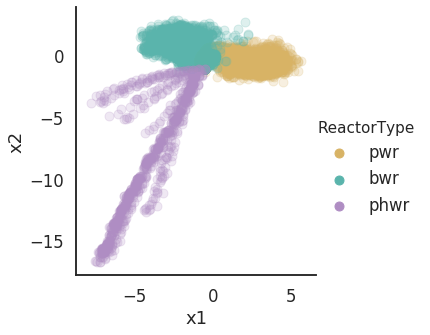

In [51]:
plt.clf()
sns.set_style('white')
sns.set_context('talk')
#sns.set(rc={'figure.figsize':(9,8)})
g = sns.lmplot(x='x1', y='x2', hue="ReactorType", palette=med, data=df, fit_reg=False, scatter_kws={'alpha':0.2})
#g = sns.lmplot(x='x1', y='x2', hue="ReactorType", palette=med, data=df, legend=False, fit_reg=False, scatter_kws={'alpha':0.5})
#plt.legend(loc='upper right', markerscale=2)
#g._legend.set_title("Reactor Type")
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
#    lh.set_sizes([50]) 
#plt.ylim(-8, 8)
#plt.xlim(-8, 8)
plt.show()

In [52]:
saveme = g.ax.get_figure()
saveme.savefig('lda-trainset_fiss.png', transparent=True)

In [8]:
lda = LinearDiscriminantAnalysis(n_components=3)
fit = lda.fit(X, yo).transform(X)

In [9]:
target_names = yo.unique()
target_names

array(['ce14x14', 'ce16x16', 'w14x14', 'w15x15', 'w17x17', 's14x14',
       's18x18', 'bw15x15', 'vver1000', 'ge7x7-0', 'ge8x8-1', 'ge9x9-2',
       'ge10x10-8', 'abb8x8-1', 'atrium9x9-9', 'atrium10x10-9',
       'svea64-1', 'svea100-0', 'vver440', 'vver440_3.82', 'vver440_4.25',
       'vver440_4.38', 'candu19', 'candu28', 'candu37'], dtype=object)

In [10]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [11]:
colors = teals[0:9] + brwns + teals[9:13] + purps

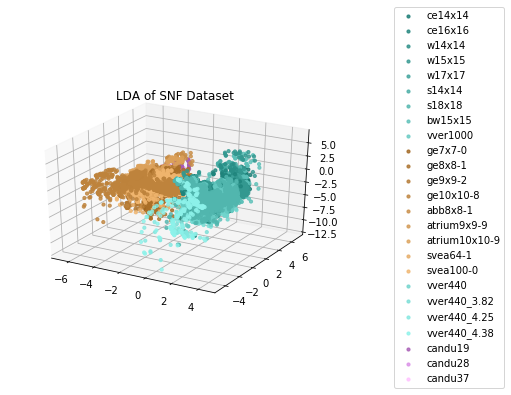

In [12]:
#target_names = ['pwr', 'bwr', 'phwr']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for color, target_name in zip(colors, target_names):
    ax.scatter(fit[yo == target_name, 0], fit[yo == target_name, 1], fit[yo == target_name, 2], 
                s=10, alpha=.8, color=color, label=target_name)
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), shadow=False)
plt.title('LDA of SNF Dataset')
plt.show()

In [13]:
fit_df = pd.DataFrame(fit, columns=['x1', 'x2'])
df = pd.concat([fit_df, y], axis=1)

ValueError: Shape of passed values is (24795, 3), indices imply (24795, 2)

In [14]:
df.head()

NameError: name 'df' is not defined

In [15]:
ax = sns.scatterplot(x='x1', y='x2', hue="ReactorType", palette=med, data=df)

NameError: name 'df' is not defined